<center>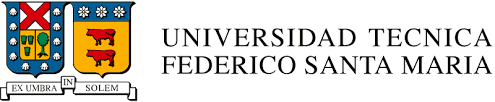</center>


# Tarea 5 de Optimización No Lineal (MAT-279) - Segundo semestre de 2022

En aplicaciones relacionadas con machine learning, se dispone de una serie de datos $\{(w_i, y_i) : i \in I\}$ con los cuales nos interesa ajustar un modelo para explicar la variable $Y$ en términos de $W$, usualmente de manera lineal (i.e. $Y \sim X^TW)$. En general, estos problemas se pueden escribir de la forma

$$\text{Minimizar} \;\; F(W) := \sum_{i \in I} f_{i}(W) + \lambda \mathcal{R}(W)\; \; \text{sobre todos los W} \in \mathbb{R}^{d},$$
donde $f_i$ representa el costo de utilizar el $i$-ésimo dato, y $\mathcal{R}$ es una función de regularización para mantener
la simpleza del modelo. En este problema, se piden estudiar dos modelos:

$\textbf{Mínimos cuadrados: } f_i(x) = (y_i - x^Tw_i)^2, y \; \mathcal{R} \equiv 0.$

$\textbf{Ridge: } f_i(x) = (y_i - x^Tw_i)^2, y \; \mathcal{R}(x) = \| \cdot \|_2.$

A continuación se desarrollaran los problemas descritos en la tarea.



### 1.- Justificar la convexidad de estos problemas.

Sea $\lambda \in \mathbb{R}$, entonces $g(x) = \lambda\| x \|_2$ es una función convexa, pues es $\| \cdot \|_2$ lo es. Sea además $h(x) = x^2, \eta_i(x) =  y_i - x^Tw_i$. Notemos que $h$ es una función convexa y $\eta_i$ una función afín para todo $i \in I$. Luego, composición de función convexa con una función afín, es una función convexa. Esto es

\begin{align}
    f_{i}(x) &= (y_i - x_i^Tw)^2 \\
    &= h (\eta_i(x)) \\
    &= (h \circ \eta_i) (x)
\end{align}

Finalmente, suma de funciones convexas es función convexa. Es decir
\begin{align}
    F(x) &= \sum_{i \in I} f_{i}(x) + \lambda \mathcal{R}(x) \\
    &= \sum_{i \in I} (h \circ \eta_i)(x) + g(x) \\
    &= \sum_{i \in I} (h \circ \eta_i + g)(x)
\end{align}
es una función convexa.

Observación: Si $\lambda = 0$, entonces $g \equiv 0$.

2.- Implementar el $\textbf{Método del gradiente}$ descrito en clases (Apunte, pág.40). Su rutina debe considerar como entradas $X, W, \lambda$ y debe entregar el vector de coeficientes óptimos $x^{*}$. Considere $\alpha, \beta \approx 0,8$. Considere los datos en $\textbf{data1.csv}$, correspondientes a las variaciones de una superficie y sometida a un sistema de fuerzas que la deforman, y una colección de variables que representan los materiales presentes en esta superficie $x_1,\ldots, x_{15}$.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [216]:
def funcion_minimos_cuadrados(x, Y, W, lamb):
    return np.linalg.norm(Y-W@x)**2

def funcion_ridge(x, Y, W, lamb):
    return np.linalg.norm(Y-W@x)**2 + (lamb * np.linalg.norm(x))
    
def gradiente_funcion_minimos_cuadrados(x, Y, W, lamb):
    return -2*W.T @ (Y - W @ x)
    
def gradiente_funcion_ridge(x, Y, W, lamb):
    return (-2*W.T @ (Y - W @ x)) + (lamb * x / np.linalg.norm(x))

def gammaf(x, Y, W, lamb, alpha, beta, f, grad_f):
    G_f = grad_f(x, Y, W, lamb)
    d = -G_f

    k = 0
    while not (f(x + (beta**k) * d, Y, W, lamb) - f(x, Y, W, lamb)) <= -(alpha * (beta**k)*(np.linalg.norm(d)**2)):
        k +=1
        
    return beta ** k


In [217]:
def gradient_method(x, Y, W, lamb, tol, alpha, beta, funcion, max_iter, reporte):
    if funcion == 'minimos cuadrados':
        f = funcion_minimos_cuadrados
        grad_f = gradiente_funcion_minimos_cuadrados
    else:
        f = funcion_ridge
        grad_f = gradiente_funcion_ridge
    
    g = grad_f(x, Y, W, lamb)
    norm = np.linalg.norm(g)
    i = 1
    while norm >= tol and i<=max_iter:
        print(f"iteraciones = {i}, norma = {norm}, valor funcion = {f(x, Y, W, lamb)}")
        d = -grad_f(x, Y, W, lamb)
        gamma = gammaf(x, Y, W, lamb, alpha, beta, f, grad_f)   
        
        if (x == (x+gamma*d)).all():
            i +=1
            break
        x = x + gamma * d
        norm = np.linalg.norm(grad_f(x, Y, W, lamb))
        
        if reporte == 'no':
            clear_output(wait=True)
        i += 1
        
    print(f"iteraciones: {i-1}")
    return x, f(x, Y, W, lamb)
    

In [218]:
data = pd.read_csv("data1.csv", sep = ";")
Y = data[["y"]].values
W = data.drop("y", axis = 1).values
x = np.random.rand(W.shape[1], 1) / 1e12

In [219]:
W_nuevo = W / np.linalg.norm(W, axis = 0)
Y_nuevo = Y / np.linalg.norm(Y, axis = 0)

In [220]:
gradient_method(x, Y_nuevo, W_nuevo, 0, 1e-2, 0.8, 0.8, 'minimos cuadrados', 1000, 'no')

iteraciones: 560


(array([[ 3.52199005],
        [-1.88084583],
        [-2.49938971],
        [-1.62433419],
        [-0.57120279],
        [ 0.24898608],
        [ 0.75987663],
        [ 0.99313938],
        [ 1.00620477],
        [ 0.8547428 ],
        [ 0.58504365],
        [ 0.23327904],
        [-0.17313339],
        [-0.61376427],
        [-1.073563  ]]),
 0.03650707129165554)

In [221]:
gradient_method(x, Y_nuevo, W_nuevo, 0, 1e-2, 0.8, 0.8, 'ridge', 1000, 'no')

iteraciones: 560


(array([[ 3.52199005],
        [-1.88084583],
        [-2.49938971],
        [-1.62433419],
        [-0.57120279],
        [ 0.24898608],
        [ 0.75987663],
        [ 0.99313938],
        [ 1.00620477],
        [ 0.8547428 ],
        [ 0.58504365],
        [ 0.23327904],
        [-0.17313339],
        [-0.61376427],
        [-1.073563  ]]),
 0.03650707129165554)

### 3.-Estimar los coeficientes para los dos modelos con $\lambda = 1$. Reporte las primeras $10$ iteraciones de su método y compare los coeficientes correspondientes.

### Minimos cuadrados

In [222]:
f1 = gradient_method(x, Y_nuevo, W_nuevo, 1, 1e-2, 0.8, 0.8, 'minimos cuadrados', 10, 'si')

iteraciones = 1, norma = 4.013056222915197, valor funcion = 1.0000000000083036
iteraciones = 2, norma = 2.451196067353933, valor funcion = 0.8132500784174851
iteraciones = 3, norma = 1.522687710466218, valor funcion = 0.7432301688398374
iteraciones = 4, norma = 0.9845690405355183, valor funcion = 0.7158737915496529
iteraciones = 5, norma = 0.6242873488201849, valor funcion = 0.7018756091265106
iteraciones = 6, norma = 0.44537564593920514, valor funcion = 0.6930851595739813
iteraciones = 7, norma = 0.6310187115682274, valor funcion = 0.6589480241117572
iteraciones = 8, norma = 0.4453759894454544, valor funcion = 0.6516053726174469
iteraciones = 9, norma = 0.4311809479662583, valor funcion = 0.6402570018276712
iteraciones = 10, norma = 0.4497414086999357, valor funcion = 0.6271095185718546
iteraciones: 10


In [223]:
print(f"coeficientes para el modelo de minimos cuadros con lambda = 1: \n {f1[0]}")

coeficientes para el modelo de minimos cuadros con lambda = 1: 
 [[ 0.10107024]
 [-0.0442518 ]
 [-0.10203365]
 [-0.11544264]
 [-0.10875874]
 [-0.09377083]
 [-0.07604284]
 [-0.05816413]
 [-0.04129393]
 [-0.02589557]
 [-0.01209301]
 [ 0.0001519 ]
 [ 0.01094998]
 [ 0.0204392 ]
 [ 0.02876194]]


### Ridge

In [224]:
f2 = gradient_method(x, Y_nuevo, W_nuevo, 1, 1e-2, 0.8, 0.8, 'ridge', 10, 'si')

iteraciones = 1, norma = 4.900657960569897, valor funcion = 1.0000000000107063
iteraciones = 2, norma = 3.061838661303225, valor funcion = 0.999999999992207
iteraciones = 3, norma = 2.0675232025769468, valor funcion = 0.910994575776546
iteraciones = 4, norma = 1.2706401129549187, valor funcion = 0.8613607785479689
iteraciones = 5, norma = 0.8006228067144593, valor funcion = 0.8424494909319439
iteraciones = 6, norma = 0.5249766870805673, valor funcion = 0.8348388782941959
iteraciones = 7, norma = 0.3290220049204289, valor funcion = 0.8308514954499967
iteraciones = 8, norma = 0.21610053454245917, valor funcion = 0.8288771057438403
iteraciones = 9, norma = 0.1433770931186735, valor funcion = 0.8275479145329336
iteraciones = 10, norma = 0.09477158681787891, valor funcion = 0.8267987903042637
iteraciones: 10


In [225]:
print(f"coeficientes para el modelo de ridge con lambda = 1: \n {f1[0]}")

coeficientes para el modelo de ridge con lambda = 1: 
 [[ 0.10107024]
 [-0.0442518 ]
 [-0.10203365]
 [-0.11544264]
 [-0.10875874]
 [-0.09377083]
 [-0.07604284]
 [-0.05816413]
 [-0.04129393]
 [-0.02589557]
 [-0.01209301]
 [ 0.0001519 ]
 [ 0.01094998]
 [ 0.0204392 ]
 [ 0.02876194]]


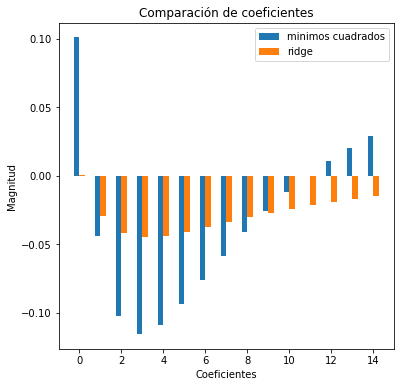

<Figure size 288x288 with 0 Axes>

In [235]:
f1_n = f1[0].reshape((15))
f2_n = f2[0].reshape((15))

t = np.arange(15)
width= 0.25

plt.rcParams["figure.figsize"] = (6, 6)
plt.bar(z-width/2, f1_n, width=width, label = "minimos cuadrados")
plt.bar(z+width/2, f2_n, width=width, label = "ridge")
plt.legend(loc='best')
plt.title("Comparación de coeficientes")
plt.xlabel("Coeficientes")
plt.ylabel("Magnitud")

plt.figure(figsize=(4,4))
plt.show()

### 4.- Estimar la regresión Ridge con parámetros $\lambda \in  \{0,01; 0,1; 1; 10; 1000\}$. Comparar las soluciones obtenidas y realizar un gráfico que muestre la diferencia en magnitud de los coeficientes $x$.

In [114]:
g1 = gradient_method(x, Y_nuevo, W_nuevo, 0.01, 1e-2, 0.8, 0.8, 'ridge', 1000, 'no')

iteraciones: 496


In [115]:
g2 = gradient_method(x, Y_nuevo, W_nuevo, 0.1, 1e-2, 0.8, 0.8, 'ridge', 1000, 'no')

iteraciones: 141


In [116]:
g3 = gradient_method(x, Y_nuevo, W_nuevo, 1, 1e-2, 0.8, 0.8, 'ridge', 1000, 'no')

iteraciones: 15


In [117]:
g4 = gradient_method(x, Y_nuevo, W_nuevo, 10, 1e-2, 0.8, 0.8, 'ridge', 1000, 'no')

iteraciones = 9, norma = 5.987443369144022, valor funcion = 1.0
iteraciones: 9


In [118]:
g5 = gradient_method(x, Y_nuevo, W_nuevo, 1000, 1e-2, 0.8, 0.8, 'ridge', 1000, 'no')

iteraciones = 8, norma = 1003.2996437912446, valor funcion = 1.0
iteraciones: 8


In [245]:
print(f"Solución con lambda 0.01 -----> f(x) = {g1[1]}\nSolución con lambda 0.1 -----> f(x) = {g2[1]}")
print(f"Solución con lambda 1 -----> f(x) = {g3[1]}\nSolución con lambda 10 -----> f(x) = {g4[1]}")
print(f"Solución con lambda 1000 -----> f(x) = {g5[1]}")

Solución con lambda 0.01 -----> f(x) = 0.09470988058215138
Solución con lambda 0.1 -----> f(x) = 0.4114662779617705
Solución con lambda 1 -----> f(x) = 0.8261686494730918
Solución con lambda 10 -----> f(x) = 1.0
Solución con lambda 1000 -----> f(x) = 1.0


In [128]:
g1_n = g1[0].reshape((15))
g2_n = g2[0].reshape((15))
g3_n = g3[0].reshape((15))
g4_n = g4[0].reshape((15))
g5_n = g5[0].reshape((15))

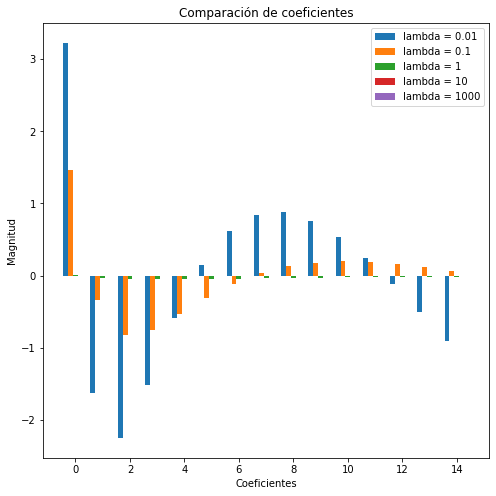

<Figure size 288x288 with 0 Axes>

In [236]:
z = np.arange(15)
width= 0.18

plt.rcParams["figure.figsize"] = (8, 8)
plt.bar(z-2*width, g1_n, width=width, label = "lambda = 0.01")
plt.bar(z-width, g2_n, width=width, label = "lambda = 0.1")
plt.bar(z, g3_n, width=width, label = "lambda = 1")
plt.bar(z+width, g4_n, width=width, label = "lambda = 10")
plt.bar(z+2*width, g5_n, width=width, label = "lambda = 1000")
plt.legend(loc='best')
plt.title("Comparación de coeficientes")
plt.xlabel("Coeficientes")
plt.ylabel("Magnitud")
plt.figure(figsize=(4,4))
plt.show()